# This notebook illustrates the use of EFCP and VFCP in quantile regression and compares the choice of some tuning parameters by these two algorithms

In [3]:
source('cqr_vanilla.r')
df=3
d = 1 
x_test <- seq(0,5,by=0.2)

alpha=0.1
n <- 500   #number of training samples
nrep <- 1 #number of independent trials
nrep2 <- 100
rho <- 0.5

evaluations <- expand.grid(1:nrep, n, x_test,"CQR")
no_eval <- nrow(evaluations)
up_mat <- lo_mat <- width_mat <- cov_mat <- data.frame(number = rep(0, no_eval), 
                                                       rep = evaluations[,1], 
                                                       nset = evaluations[,2],
                                                       X_test = evaluations[,3],
                                                       method = evaluations[,4])
colnames(width_mat) <- colnames(cov_mat) <- c("number", "rep", "sample size", "test_value","method")


set.seed(1)
  
X=as.matrix(runif(n,0,5))	
eps1=rnorm(n)
eps2=rnorm(n)
Y=rpois(n,sin(X[,1])^2 +0.1 )+0.03*X[,1]*eps1+25*(runif(n,0,1)<0.01)*eps2

#X0=as.matrix(x_test)
X0 = runif(nrep2,0,5)
X0 = as.matrix(X0[order(X0)])
eps01=rnorm(nrep2)
eps02=rnorm(nrep2)
Y0=rpois(nrep2,sin(X0)^2 +0.1 )+0.03*X0*eps01+25*(runif(nrep2,0,1)<0.01)*eps02


beta_fixed = 0.05
mtry_fixed = 1
ntree_fixed = 100
    
tmp =   try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha))
while (class(tmp)=="try-error"){
  tmp =   try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha),silent=TRUE)
}
    
width_vec_cqr = tmp$pred_set(X0, Y0)[[2]]
cov_vec_cqr = tmp$pred_set(X0, Y0)[[1]]
y_lo_cqr <- tmp$pred_set(X0, Y0)[[3]]
y_up_cqr <- tmp$pred_set(X0, Y0)[[4]]
quant_lo_cqr <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_cqr <- tmp$pred_set(X0, Y0)[[6]]


source('cqr_function_conditional.r') 
method = "efficient"
split <- 1/2
beta_grid <- seq(0.01, 0.4, by=0.01)
mtry_grid <- 1
ntree_grid <- seq(50, 400, by = 50)

tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))    
while (class(tmp)=="try-error"){
tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
}
    
width_vec_efcp = tmp$pred_set(X0, Y0)[[2]]
cov_vec_efcp = tmp$pred_set(X0, Y0)[[1]]

y_lo_efcp <- tmp$pred_set(X0, Y0)[[3]]
y_up_efcp <- tmp$pred_set(X0, Y0)[[4]]

quant_lo_efcp <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_efcp <- tmp$pred_set(X0, Y0)[[6]]

method = "valid"
split <- c(1/2,1/2)

tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))    
while (class(tmp)=="try-error"){
tmp =   try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
}
    
width_vec_vfcp = tmp$pred_set(X0, Y0)[[2]]
cov_vec_vfcp = tmp$pred_set(X0, Y0)[[1]]

y_lo_vfcp <- tmp$pred_set(X0, Y0)[[3]]
y_up_vfcp <- tmp$pred_set(X0, Y0)[[4]]

quant_lo_vfcp <- tmp$pred_set(X0, Y0)[[5]]
quant_hi_vfcp <- tmp$pred_set(X0, Y0)[[6]]

CQR average coverage: 0.93 average width: 2.11166804747558

EFCP average coverage: 0.91 average width: 2.38413449734255

VFCP average coverage: 0.88 average width: 3.35775120043232



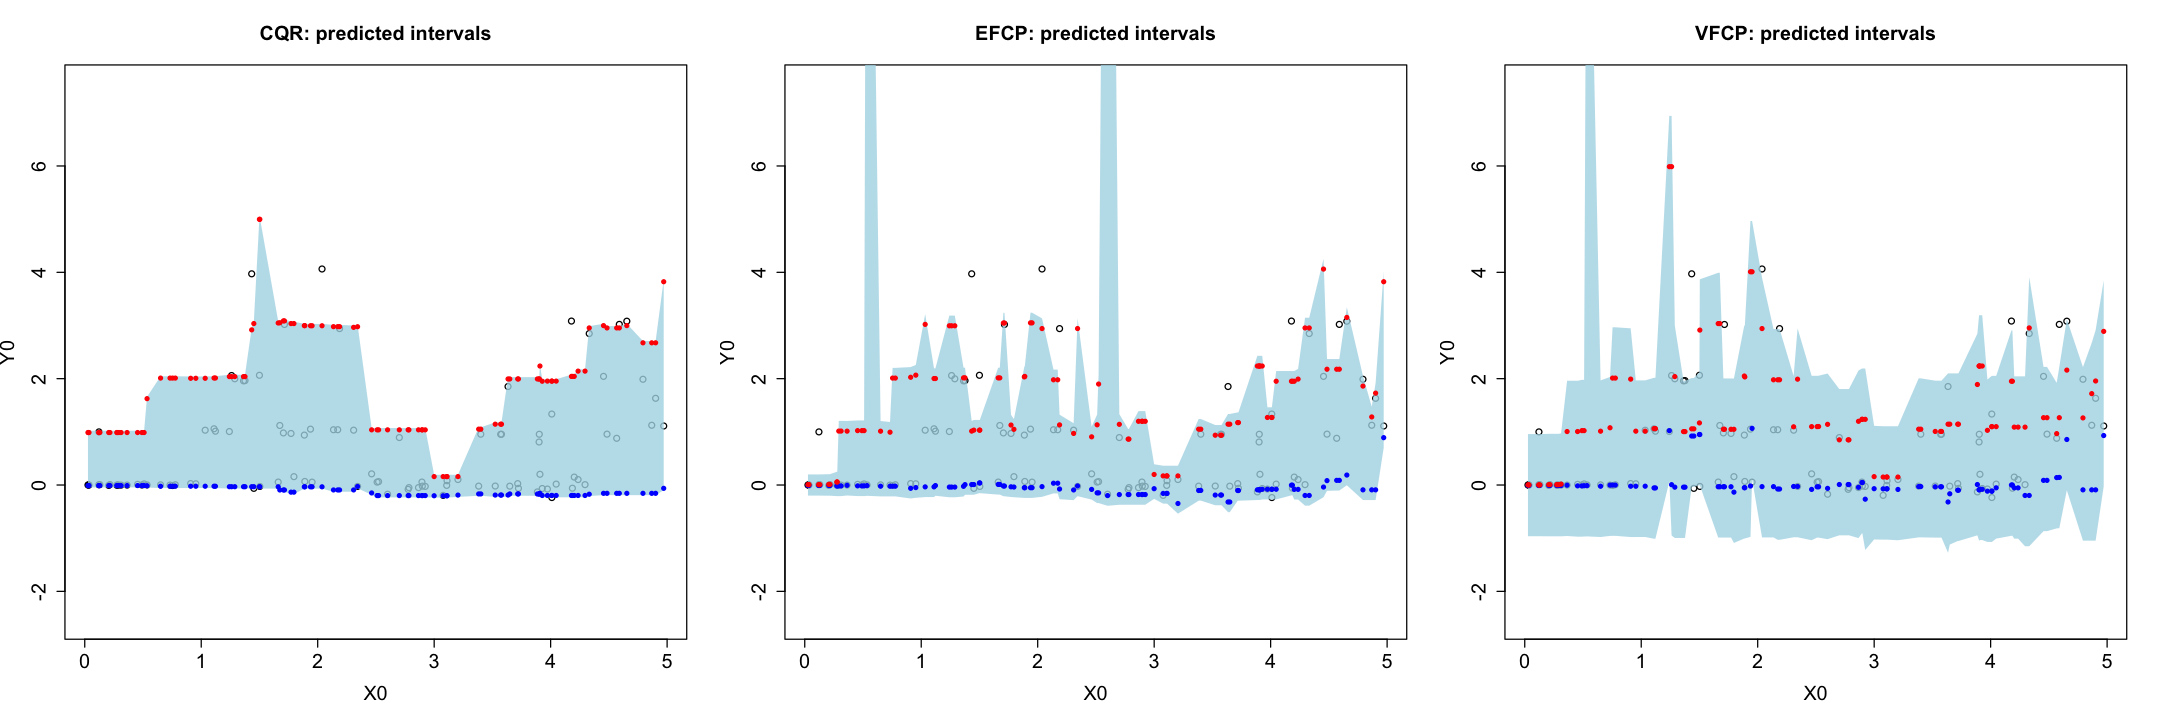

In [17]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3))
plot(X0,Y0,pch=1,col="black",main="CQR: predicted intervals",ylim=c(-2.5,7.5), cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
a = data.frame(x = X0, y = y_lo_cqr)
b = data.frame(x = c(1:100), y = y_up_cqr)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_cqr,col="blue",pch=20)
points(X0, quant_hi_cqr,col="red",pch=20)

plot(X0,Y0,pch=1,col="black",main="EFCP: predicted intervals",ylim=c(-2.5,7.5), cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
a = data.frame(x = X0, y = y_lo_efcp)
b = data.frame(x = c(1:100), y = y_up_efcp)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_efcp,col="blue",pch=20)
points(X0, quant_hi_efcp,col="red",pch=20)

plot(X0,Y0,pch=1,col="black",main="VFCP: predicted intervals",ylim=c(-2.5,7.5), cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
a = data.frame(x = X0, y = y_lo_vfcp)
b = data.frame(x = c(1:100), y = y_up_vfcp)
c1 <- rgb(173,216,230,max = 255, alpha = 200, names = "lt.blue")
polygon(c(a$x, rev(a$x)), c(b$y ,rev(a$y)), col = c1,border=NA )
points(X0, quant_lo_vfcp,col="blue",pch=20)
points(X0, quant_hi_vfcp,col="red",pch=20)

message("CQR average coverage: ",mean(cov_vec_cqr), " average width: ",mean(width_vec_cqr) )
message("EFCP average coverage: ",mean(cov_vec_efcp), " average width: ",mean(width_vec_efcp) )
message("VFCP average coverage: ",mean(cov_vec_vfcp), " average width: ",mean(width_vec_vfcp) )

The black circled points in the figure above are the test data points, and the red and blue points representing the lower and upper quantile regression estimates based on quantile random forests. The shaded region visualizes the constructed prediction intervals obtained by CQR. As can be seen, our method obtained valid prediction interval. Notice how the length of constructed interval varies with $X$, reflecting the uncertainty in the prediction of $Y $.


# Fix a grid of test points of x between 0 and 5. For each test point x, generate 100 y's using the underlying model and use the average coverage for the conditional coverage at x. Notice that the width of the prediction interval does not depend on y.

In [26]:
n <- 400
x_test = seq(0,5,by=0.2)
alpha <- 0.1 #miscoverage level
nrep  <-  10 #number of independent trials
nrep2 <- 100 #number of y's for each test point x

evaluations <- expand.grid(1:nrep, n, x_test, c("efficient", "valid","CQR"))
no_eval <- nrow(evaluations)
ntree_mat <- beta_mat <- cqr_method_mat <- width_mat <- cov_mat <- data.frame(number = rep(0, no_eval),
                                   rep = evaluations[,1],
                                   nset = evaluations[,2],
                                   X_test = evaluations[,3],
                                   method = evaluations[,4])
colnames(width_mat) <- colnames(cov_mat) <- c("number", "rep", "sample size", "test_value","method")

for(idx in 1:nrow(evaluations)){
  set.seed(evaluations[idx, 1])


  x0 = evaluations[idx, 3]


  X <- as.matrix(runif(n,0,5))
  eps1 <- rnorm(n)
  eps2 <- rnorm(n)
  Y <- rpois(n,sin(X[,1])^2 +0.1 )+0.03*X[,1]*eps1+25*(runif(n,0,1)<0.01*eps2)

  X0 <- as.matrix(rep(x0,nrep2))
  eps01 <- rnorm(nrep2)
  eps02 <- rnorm(nrep2)
  Y0 <- rpois(nrep2,sin(X0)^2 +0.1 )+0.03*X0*eps01+25*(runif(nrep2,0,1)<0.01*eps02)

  width_mat[idx,3] <- cov_mat[idx, 3] <- n
  method <- evaluations[idx, 4]

  if (method =="CQR"){
    beta_fixed <- 0.05
    mtry_fixed <- 1
    ntree_fixed <- 100

    tmp <- try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha))

    while (class(tmp)=="try-error"){

      tmp <- try(conf_CQR_conditional(X, Y, beta_fixed, mtry_fixed, ntree_fixed, alpha = alpha),silent=TRUE)

    }
    width_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[2]])
    cov_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[1]])
  }else{ if(method == "valid"){
    split <- c(1/2, 1/2)
  } else {
    split <- 1/2
  }

  beta_grid <- seq(1e-03, 4, length = 20)*alpha
  mtry_grid <- unique(ceiling(seq(1/10, 1, length = 20)*d))
  ntree_grid <- seq(50, 400, by = 50)

  tmp <- try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha))

  while (class(tmp)=="try-error"){
    tmp <- try(conf_CQR_reg_conditional(X, Y, split = split, beta_grid, mtry_grid, ntree_grid, method = method, alpha = alpha),silent=TRUE)
  }
        
  beta_mat[idx,1] = tmp$beta
  ntree_mat[idx,1] = tmp$ntree  
  cqr_method_mat[idx, 1]= tmp$cqr_method      
  width_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[2]])
  cov_mat[idx, 1] <- mean(tmp$pred_set(X0, Y0)[[1]])
  }
}



save(x_test, n,nrep,width_mat, cov_mat,beta_mat, ntree_mat, cqr_method_mat, evaluations, alpha, file = "pois-runif(0,5)-n=400-100-repetitions.RData" )

In [69]:
load("pois-runif(0,5)-n=400-100-repetitions.RData")
width_cqr <- sd_width_cqr  <-  width_efcp <- width_vfcp <- sd_width_efcp <- sd_width_vfcp <- NULL
for(x in x_test){
  TMP <- width_mat[evaluations[,4] == "efficient", ]
  TMP_prime <- TMP[TMP[,4] == x,]

  TMP <- width_mat[evaluations[,4] == "valid", ]
  TMP_prime_vfcp <- TMP[TMP[,4] == x,]

  TMP <- width_mat[evaluations[,4] == "CQR", ]
  TMP_prime_cqr <- TMP[TMP[,4] == x,]


    width_efcp <- c(width_efcp, mean(TMP_prime[,1] ))
    width_vfcp <- c(width_vfcp, mean(TMP_prime_vfcp[,1]))
    width_cqr <- c(width_cqr, mean(TMP_prime_cqr[,1]))
  #width_efcp <- c(width_efcp, mean(TMP_prime[,1] / TMP_prime_vfcp[,1]))
  #sd_width_efcp <- c(sd_width_efcp, sd(TMP_prime[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

  #width_vfcp <- c(width_vfcp, mean(TMP_prime_vfcp[,1] / TMP_prime_vfcp[,1]))
  #sd_width_vfcp <- c(sd_width_vfcp, sd(TMP_prime_vfcp[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

  #width_cqr <- c(width_cqr, mean(TMP_prime_cqr[,1] / TMP_prime_vfcp[,1]))
  #sd_width_cqr <- c(sd_width_cqr, sd(TMP_prime_cqr[,1]/ TMP_prime_vfcp[,1])/sqrt(nrep))

}

cov_cqr <-sd_cov_cqr <-cov_efcp <- cov_vfcp <-sd_cov_efcp <- sd_cov_vfcp <- NULL
for(x in x_test){
  TMP <- cov_mat[evaluations[,4] == "efficient", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_efcp <- c( cov_efcp, mean(TMP_prime[,1] ) )
  sd_cov_efcp <- c(sd_cov_efcp, sd(TMP_prime[,1])/sqrt(nrep))

  TMP <- cov_mat[evaluations[,4] == "valid", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_vfcp <- c(cov_vfcp, mean(TMP_prime[,1]))
  sd_cov_vfcp <- c(sd_cov_vfcp, sd(TMP_prime[,1])/sqrt(nrep))

  TMP <- cov_mat[evaluations[,4] == "CQR", ]
  TMP_prime <- TMP[TMP[,4] == x,]
  cov_cqr <- c(cov_cqr, mean(TMP_prime[,1]))
  sd_cov_cqr <- c(sd_cov_cqr, sd(TMP_prime[,1])/sqrt(nrep))
}



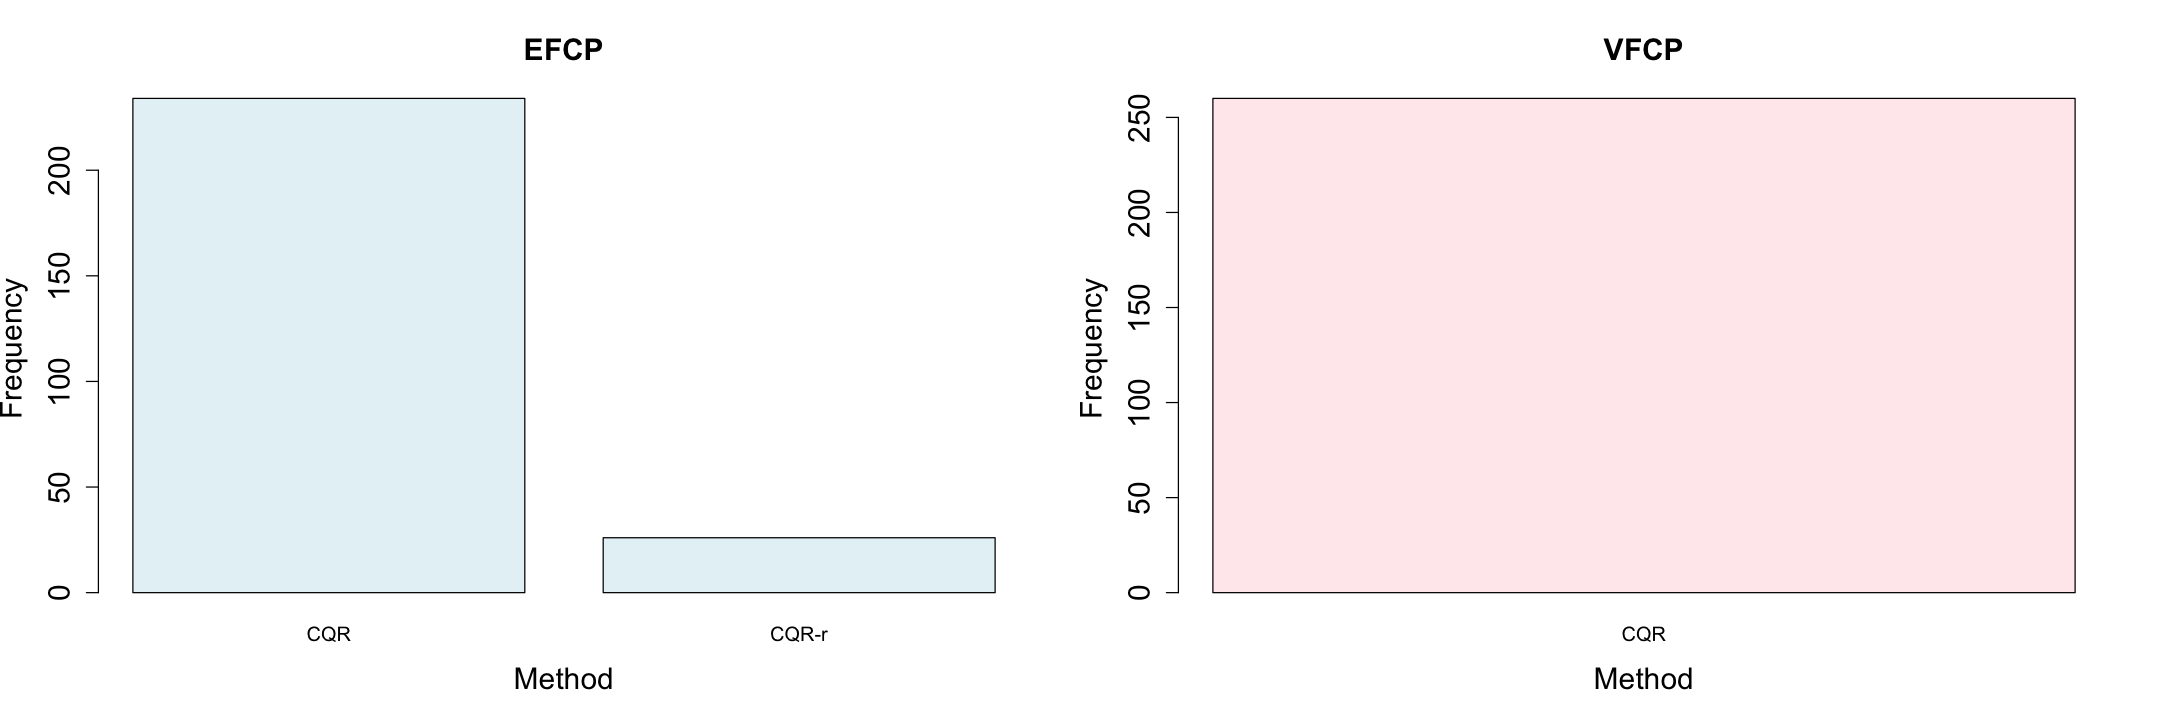

In [70]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

par(mfrow=c(1,2))
plot(factor(cqr_method_mat[evaluations[,4] == "valid",1]),col=c1, main="EFCP",cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5,xlab="Method",ylab="Frequency")
#legend("right", legend=c("EFCP", "VFCP"),fill=c(c1, c2))
plot(factor(cqr_method_mat[evaluations[,4] == "efficient",1]),col=c2, main="VFCP",cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5,xlab="Method",ylab="Frequency")

The above plot shows that among the three conformal quantile regression methods: CQR, CQR-m, CQR-r, both EFCP and VFCP uses CQR the most.

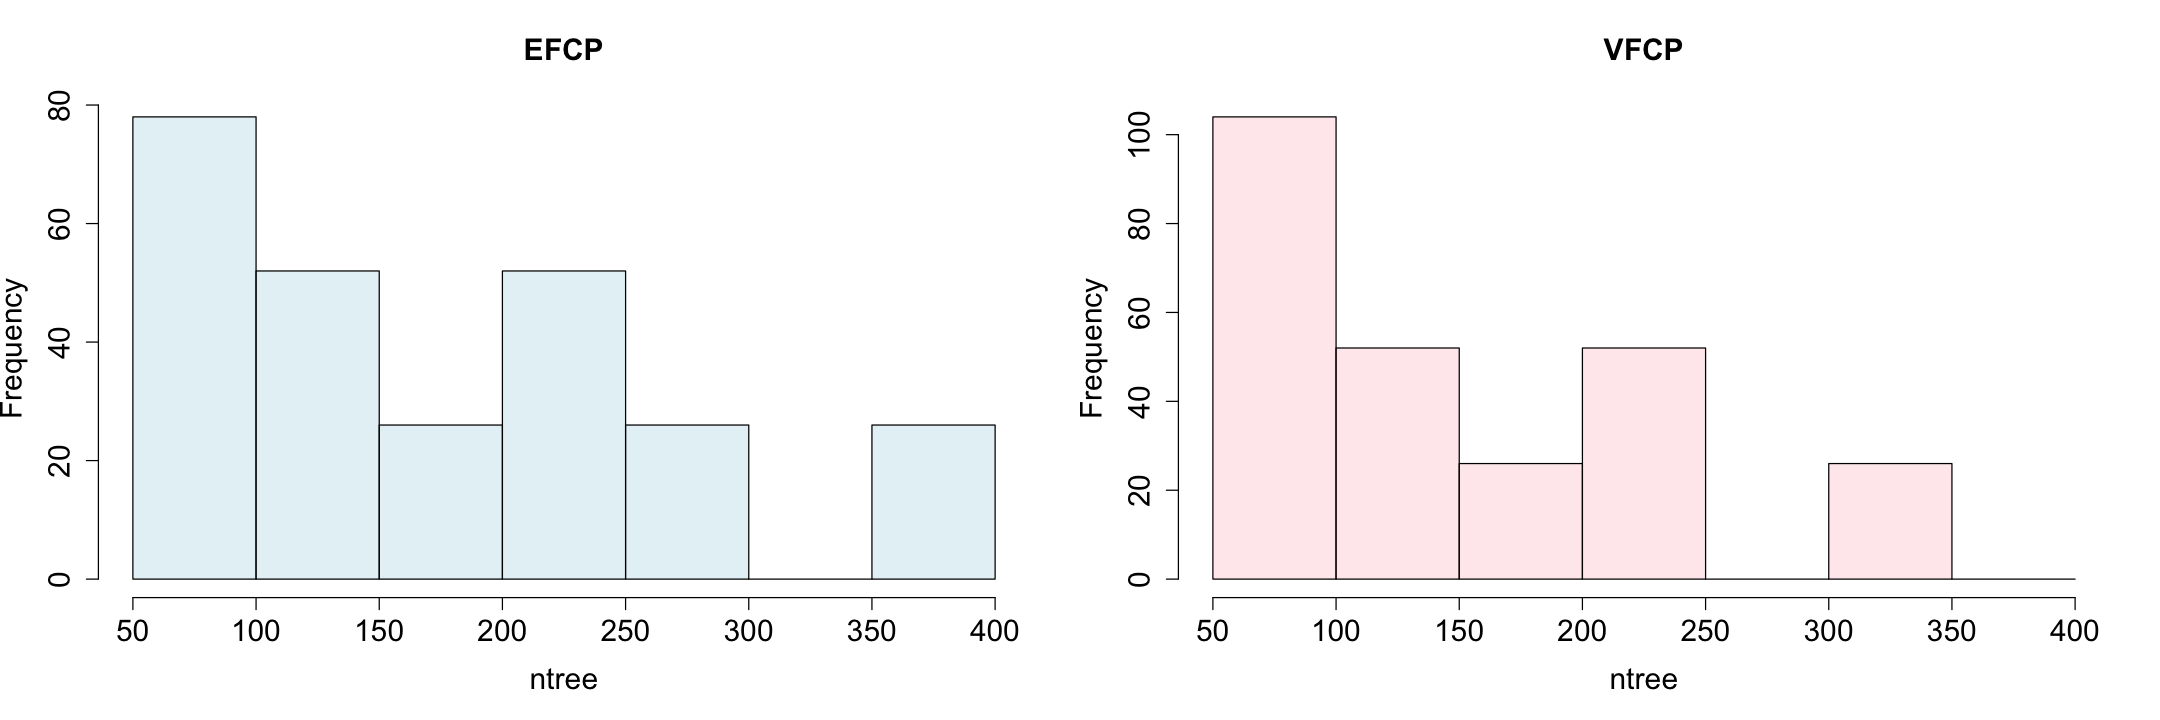

In [71]:
par(mfrow=c(1,2))
hist(ntree_mat[evaluations[,4] == "efficient",1],col=c1,breaks=ntree_grid,main="EFCP",xlab="ntree",cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(ntree_mat[evaluations[,4] == "valid",1],col=c2,breaks=ntree_grid,main="VFCP",xlab="ntree",cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
#legend("left", legend=c("EFCP", "VFCP"), fill=c(c1, c2))

The histograms of ntree shows that for both EFCP and VFCP, it doesn't happen necessarily that a larger number of ntree would lead to a better performance, and that the two algorithms behave similarly when in the choice of this parameter.

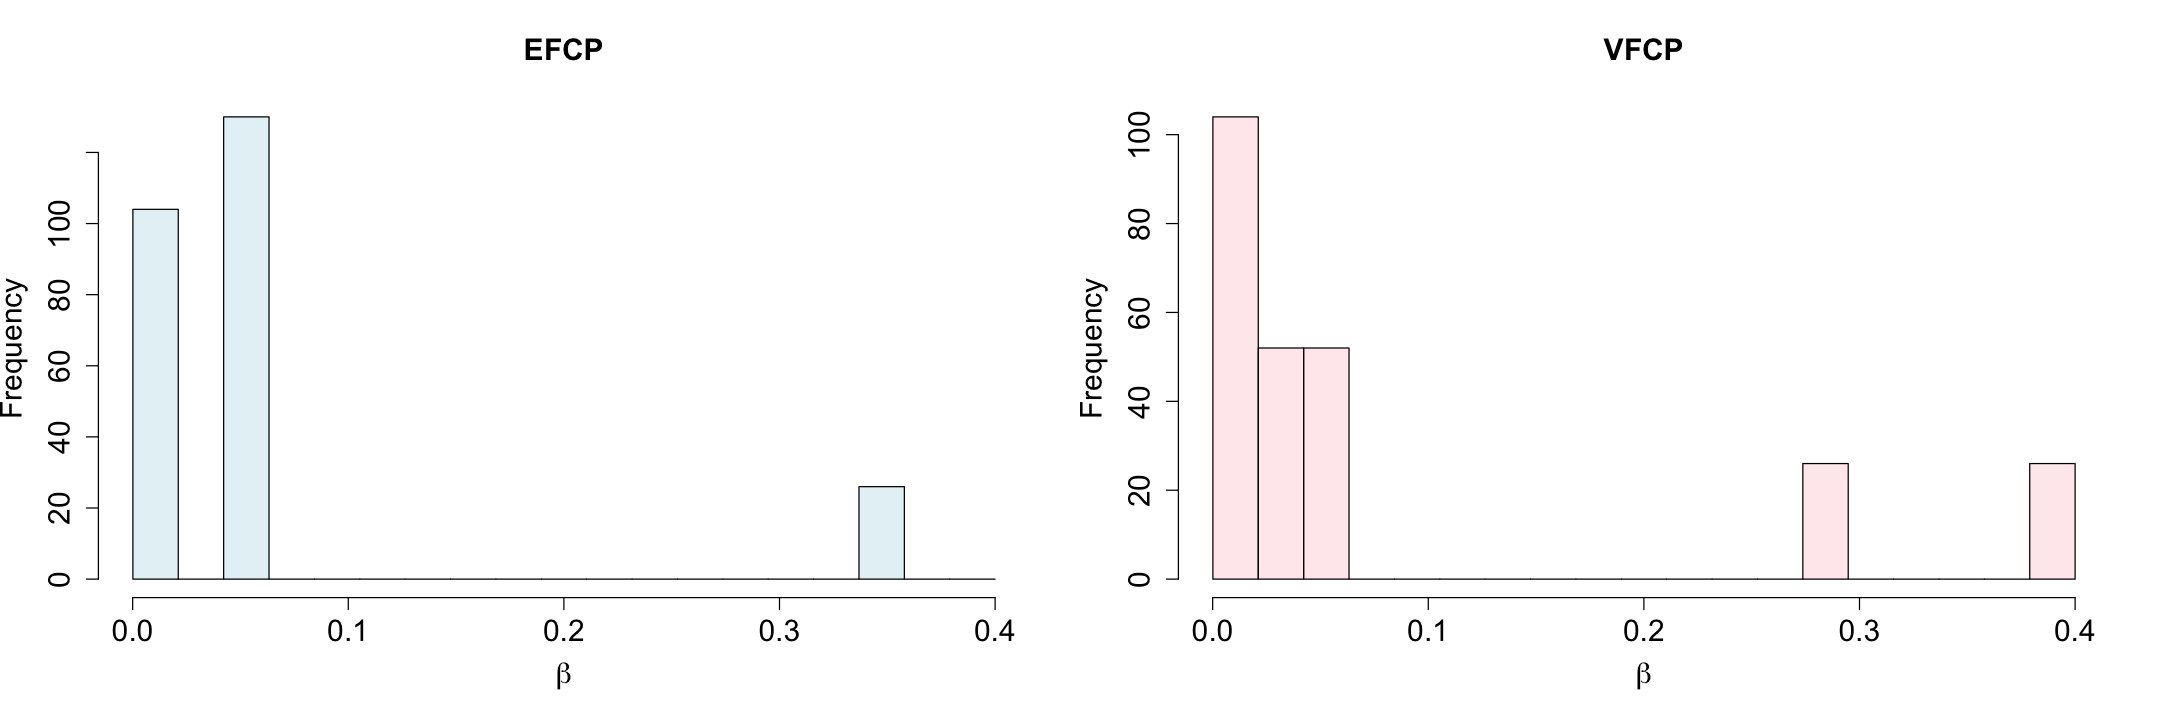

In [72]:
par(mfrow=c(1,2))
hist(beta_mat[evaluations[,4] == "efficient",1],col=c1,breaks=beta_grid,main="EFCP",xlab=expression(beta),cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(beta_mat[evaluations[,4] == "valid",1],col=c2,breaks=beta_grid,main="VFCP",xlab=expression(beta),cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
#legend("top", legend=c("EFCP", "VFCP"),fill=c(c1, c2))

The histograms of beta shows that both EFCP and VFCP ten to choose $\beta$ close to zero.

# Conditional width and coverage

CQR average coverage: 0.914846153846154 average width: 2.34780819664582

EFCP average coverage: 0.885384615384615 average width: 2.00701327764938

VFCP average coverage: 0.905807692307692 average width: 2.60488638005523



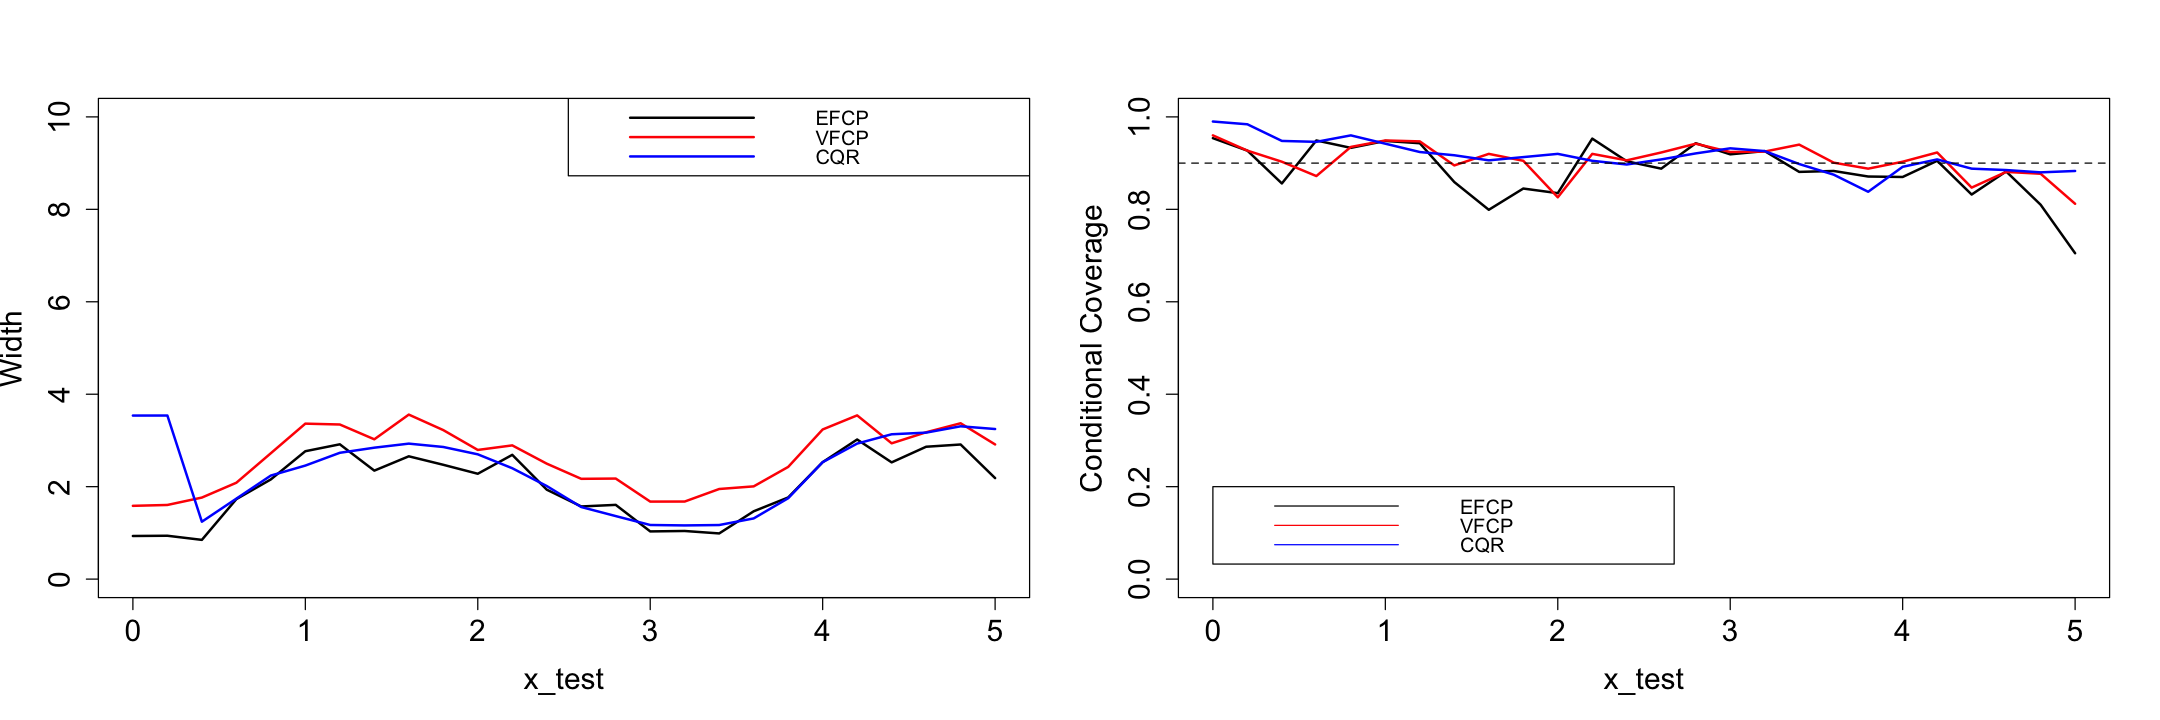

In [74]:
par(mfrow = c(1,2))
plot(x_test, width_efcp, type = 'l', ylim = c(0,10), lwd = 2,ylab="Width", cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
#lines(x_test, width_efcp - sd_width_efcp, type = 'l', lty = 2, lwd = 2)
#lines(x_test, width_efcp + sd_width_efcp, type = 'l', lty = 2, lwd = 2)
lines(x_test, width_vfcp, type = 'l', ylim = range(c(width_efcp, width_vfcp)), lwd = 2, col = "red")
#lines(x_test, width_vfcp - sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
#lines(x_test, width_vfcp + sd_width_vfcp, type = 'l', lty = 2, lwd = 2, col = "red")
lines(x_test, width_cqr, type = 'l', ylim = range(c(width_efcp, width_vfcp)), lwd = 2, col = "blue")
legend("topright", legend=c("EFCP", "VFCP","CQR"),
       col=c("black","red", "blue"), lty=1, lwd=2)

plot(x_test, cov_efcp, type = 'l', ylim = c(0, 1), lwd = 2,ylab="Conditional Coverage", cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
lines(x_test, cov_vfcp, type = 'l', col = "red", lwd = 2)
lines(x_test, cov_cqr, type = 'l', col = "blue", lwd = 2)
legend(0,0.2, legend=c("EFCP", "VFCP","CQR"),
       col=c("black","red", "blue"), lty=1)
abline(h = 1-alpha,lty=2)

message("CQR average coverage: ",mean(cov_cqr), " average width: ",mean(width_cqr) )
message("EFCP average coverage: ",mean(cov_efcp), " average width: ",mean(width_efcp) )
message("VFCP average coverage: ",mean(cov_vfcp), " average width: ",mean(width_vfcp) )

The left figure above shows that in terms of width, EFCP is nearly always better than VFCP and CQR; while VFCP is better than EFCP is terms of coverage.